##### Python 和 Pandas 分析犯罪记录开放数据？ - 简书
https://www.jianshu.com/p/3d40757e5d06

### Download data file

In [1]:
import os.path

url = "http://data.cityofdenton.com/dataset/17695047-0aeb-46a2-a9db-66847743ed1c/resource/d356a409-6764-46d7-942d-4d5a7ffb1c28/download/crime_data_20190301.csv"

In [2]:
# from pathlib import Path

In [3]:
# data_file = "~/Documents/jupyter/21_crime_record/crime_data_20190301.csv"

In [4]:
if os.path.exists("crime_data_20190301.csv"):
    print("data file already exists!")  
else:
    print("start download data file")
    !wget {url} # download the data from the url \
    print("data file is ready")

data file already exists!


### data prepare 


In [5]:
import pandas as pd 

In [8]:
df = pd.read_csv('crime_data_20190301.csv')

In [9]:
df.head()

,crime,locname,incidentdatetime,publicadress,agency,accuracy
0,DRUG/NARCOTIC VIOLATIONS,COMMERCIAL/OFFICE BUILDING,2009-12-31 00:26:00,30XX COLORADO BLVD,Denton Police Department,Address
1,ALL OTHER OFFENSES,HIGHWAY/ROAD/ALLEY,2009-12-31 00:59:00,39XX E MCKINNEY ST,Denton Police Department,Address
2,DRIVING UNDER THE INFLUENCE,HIGHWAY/ROAD/ALLEY,2009-12-31 02:08:14,LINDSEY ST // FORT WORTH DR,Denton Police Department,Intersection
3,DRUNKENNESS,BAR/NIGHT CLUB,2009-12-31 02:51:17,10XX S AVE C,Denton Police Department,Address
4,DRUNKENNESS,HIGHWAY/ROAD/ALLEY,2009-12-31 02:44:49,13XX W HICKORY ST,Denton Police Department,Address


In [11]:
# value_counts() is similar to Groupby
df.crime.value_counts().iloc[:10]

SIMPLE ASSAULT                              8151
ALL OTHER LARCENY                           7822
DRUNKENNESS                                 6692
DESTRUCTIVE/DAMAGE/VANDALISM OF PROPERTY    6690
SHOPLIFTING                                 5913
THEFT FROM MOTOR VEHICLE                    5612
DRUG/NARCOTIC VIOLATIONS                    5015
FALSE PRETENSE/SWINDLE/CONFIDENCE GAME      4677
BURGLARY/BREAKING AND ENTERING              4482
DRIVING UNDER THE INFLUENCE                 4447
Name: crime, dtype: int64

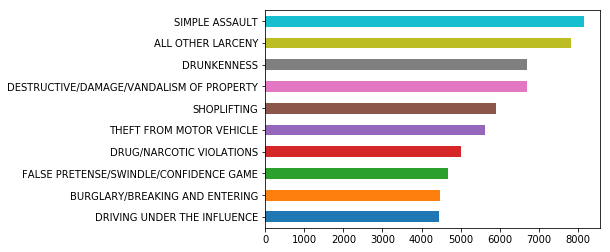

In [13]:
# show the value_counts()
# 调用 Pandas 内置的绘图函数 plot
# 指定绘图类型为“横向条状图”（barh）
df.crime.value_counts().iloc[:10].sort_values().plot(kind='barh')

In [15]:
# 抢劫类型的犯罪单独提炼出来，存储在 robbery 这样一个新的数据框里。
robbery = df[df.crime.str.contains('ROBBERY')]; 

robbery.head()

,crime,locname,incidentdatetime,publicadress,agency,accuracy
124,ROBBERY,SPECIALTY STORE,2010-01-05 16:45:00,19XX BRINKER RD,Denton Police Department,Address
126,ROBBERY,RESIDENCE/HOME,2010-01-05 16:30:00,4XX BERNARD ST,Denton Police Department,Address
585,ROBBERY,RESIDENCE/HOME,2010-01-24 22:00:00,20XX TEASLEY LN,Denton Police Department,Address
1009,ROBBERY,RESIDENCE/HOME,2010-02-03 23:00:00,6XX W SYCAMORE ST,Denton Police Department,Address
1155,ROBBERY,DEPARTMENT/DISCOUNT STORE,2010-02-22 19:30:00,22XX S I35E,Denton Police Department,Address


In [16]:
robbery.shape

(660, 6)

### method 1: value_counts( ) 

In [23]:
robbery.locname.value_counts()   

RESIDENCE/HOME                         248
CONVENIENCE STORE                      117
DEPARTMENT/DISCOUNT STORE               54
HIGHWAY/ROAD/ALLEY                      49
RESTAURANT                              48
SPECIALTY STORE                         30
HOTEL/MOTEL/ETC.                        28
BANK/SAVINGS AND LOAN                   22
OTHER/UNKNOWN                           19
FIELD/WOODS                             11
GROCERY/SUPERMARKET                      6
DRUG STORE/DOCTOR'S OFFICE/HOSPITAL      6
PARK/PLAYGROUND                          4
BAR/NIGHT CLUB                           3
CHURCH/SYNAGOGUE/TEMPLE                  3
LIQUOR STORE                             2
SHOPPING MALL                            2
GOVERNMENT/PUBLIC BUILDING               2
SCHOOL/COLLEGE                           1
COMMERCIAL/OFFICE BUILDING               1
SERVICE/GAS STATION                      1
SCHOOL-ELEMENTARY/SECONDARY              1
AIR/BUS/TRAIN TERMINAL                   1
PARKING LOT

### method2: groupby( )  

In [24]:
robbery.groupby('locname').size().sort_values(ascending=False)

locname
RESIDENCE/HOME                         248
CONVENIENCE STORE                      117
DEPARTMENT/DISCOUNT STORE               54
HIGHWAY/ROAD/ALLEY                      49
RESTAURANT                              48
SPECIALTY STORE                         30
HOTEL/MOTEL/ETC.                        28
BANK/SAVINGS AND LOAN                   22
OTHER/UNKNOWN                           19
FIELD/WOODS                             11
GROCERY/SUPERMARKET                      6
DRUG STORE/DOCTOR'S OFFICE/HOSPITAL      6
PARK/PLAYGROUND                          4
BAR/NIGHT CLUB                           3
CHURCH/SYNAGOGUE/TEMPLE                  3
LIQUOR STORE                             2
SHOPPING MALL                            2
GOVERNMENT/PUBLIC BUILDING               2
COMMERCIAL/OFFICE BUILDING               1
SCHOOL-ELEMENTARY/SECONDARY              1
SERVICE/GAS STATION                      1
SCHOOL/COLLEGE                           1
PARKING LOT/GARAGE                       1
AIR

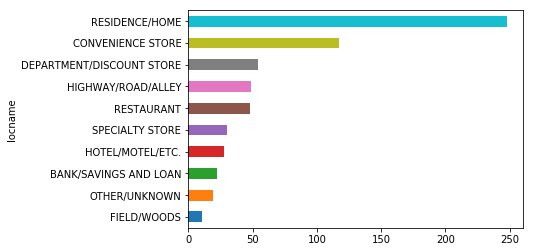

In [25]:
robbery.groupby('locname').size().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')


In [ ]:
### count by street name 

In [26]:
regex = r"\d+XX\s(?P<street>.*)"
subst = "\\g<street>"

In [27]:
robbery["street"] = robbery.publicadress.str.replace(regex, subst)

/home/hanl9/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
robbery.head()

,crime,locname,incidentdatetime,publicadress,agency,accuracy,street
124,ROBBERY,SPECIALTY STORE,2010-01-05 16:45:00,19XX BRINKER RD,Denton Police Department,Address,BRINKER RD
126,ROBBERY,RESIDENCE/HOME,2010-01-05 16:30:00,4XX BERNARD ST,Denton Police Department,Address,BERNARD ST
585,ROBBERY,RESIDENCE/HOME,2010-01-24 22:00:00,20XX TEASLEY LN,Denton Police Department,Address,TEASLEY LN
1009,ROBBERY,RESIDENCE/HOME,2010-02-03 23:00:00,6XX W SYCAMORE ST,Denton Police Department,Address,W SYCAMORE ST
1155,ROBBERY,DEPARTMENT/DISCOUNT STORE,2010-02-22 19:30:00,22XX S I35E,Denton Police Department,Address,S I35E


In [29]:
robbery.groupby('street').size().sort_values(ascending=False).head(10)

street
W UNIVERSITY DR    54
S I35E             44
E MCKINNEY ST      30
S LOOP 288         27
TEASLEY LN         26
I35                20
FORT WORTH DR      20
W OAK ST           17
BERNARD ST         13
N ELM ST           12
dtype: int64

In [30]:
!pip install python-dateutil

In [32]:
from dateutil.parser import *

In [33]:
# 目前的日期时间列（incidentdatetime）是个字符串，因此我们可以直接用 parse 函数解析它，并且抽取其中的年份（year）项。

robbery["year"] = robbery.incidentdatetime.apply(lambda x: parse(x).year)

robbery["month"] = robbery.incidentdatetime.apply(lambda x: parse(x).month)

robbery["hour"] = robbery.incidentdatetime.apply(lambda x: parse(x).hour)




/home/hanl9/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hanl9/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/hanl9/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [34]:
robbery.head()

,crime,locname,incidentdatetime,publicadress,agency,accuracy,street,year,month,hour
124,ROBBERY,SPECIALTY STORE,2010-01-05 16:45:00,19XX BRINKER RD,Denton Police Department,Address,BRINKER RD,2010,1,16
126,ROBBERY,RESIDENCE/HOME,2010-01-05 16:30:00,4XX BERNARD ST,Denton Police Department,Address,BERNARD ST,2010,1,16
585,ROBBERY,RESIDENCE/HOME,2010-01-24 22:00:00,20XX TEASLEY LN,Denton Police Department,Address,TEASLEY LN,2010,1,22
1009,ROBBERY,RESIDENCE/HOME,2010-02-03 23:00:00,6XX W SYCAMORE ST,Denton Police Department,Address,W SYCAMORE ST,2010,2,23
1155,ROBBERY,DEPARTMENT/DISCOUNT STORE,2010-02-22 19:30:00,22XX S I35E,Denton Police Department,Address,S I35E,2010,2,19


In [35]:
robbery.groupby('year').size()

year
2010    65
2011    54
2012    81
2013    64
2014    55
2015    61
2016    73
2017    94
2018    96
2019    17
dtype: int64

In [36]:
robbery = robbery[~(robbery.year == 2019)]

In [37]:
robbery.shape

(643, 10)

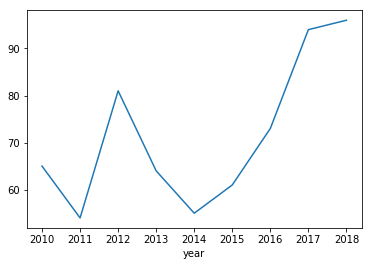

In [38]:
robbery.groupby('year').size().plot()

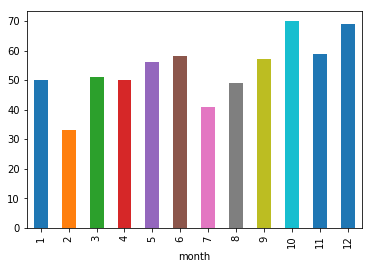

In [39]:
robbery.groupby('month').size().plot(kind='bar')

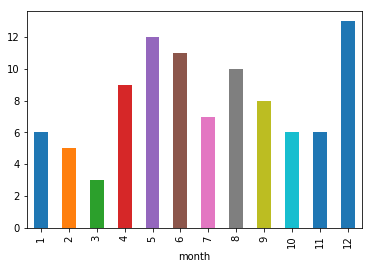

In [40]:
robbery[robbery.year==2018].groupby('month').size().plot(kind='bar')

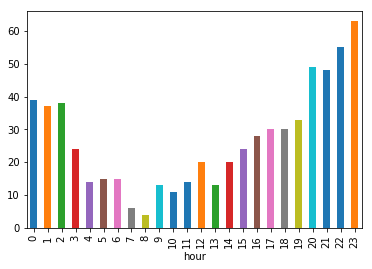

In [41]:
robbery.groupby('hour').size().plot(kind='bar')

In [42]:
robbery[robbery.year==2018].groupby(['month', 'hour']).size()


month  hour
1      4       1
       18      1
       19      1
       20      3
2      1       1
       3       1
       10      1
       13      1
       19      1
3      7       1
       16      1
       20      1
4      3       1
       6       1
       10      2
       15      1
       18      1
       21      2
       22      1
5      0       2
       1       3
       8       1
       15      1
       20      2
       21      2
       22      1
6      2       1
       3       1
       5       1
       11      1
              ..
8      6       2
       9       1
       12      1
       14      1
       15      2
       23      1
9      1       1
       2       2
       5       1
       17      1
       18      1
       19      1
       21      1
10     2       1
       16      1
       18      1
       20      2
       22      1
11     9       1
       11      1
       14      1
       23      3
12     1       1
       11      2
       12      3
       16      2
       18      1
  

In [43]:
robbery[robbery.year==2018].groupby(['month', 'hour']).size().unstack(0)


month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,1.0,NaN,NaN
3,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
6,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
7,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
robbery[robbery.year==2018].groupby(['month', 'hour']).size().unstack(0).fillna(0)


month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f065b895470>,
      dtype=object)

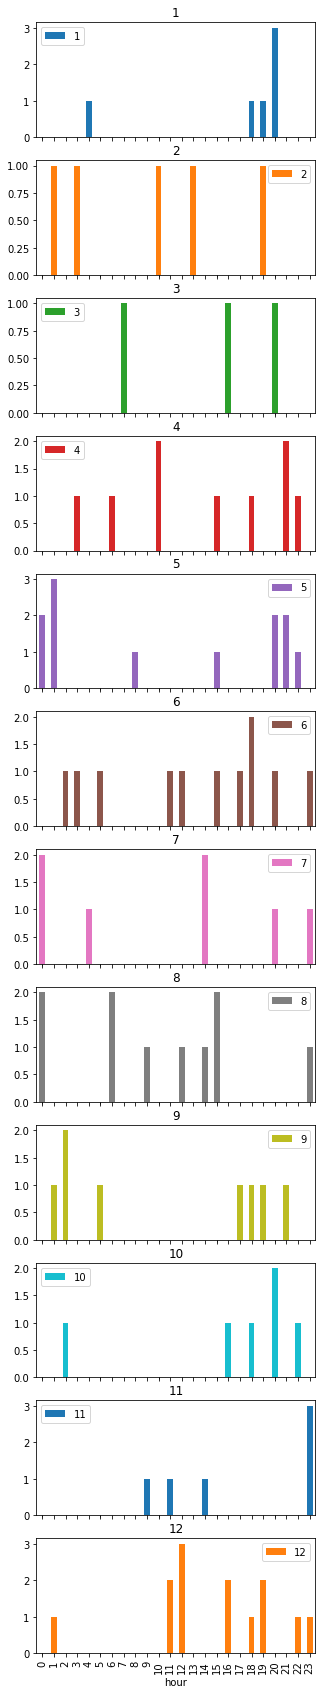

In [46]:
robbery[robbery.year==2018].groupby(['month', 'hour']).size().unstack(0).fillna(0).plot(subplots=True, kind='bar', figsize=(5,30))
